# creating own array
1. initialize array
2. fill array
3. vizualize array 2-dimensional

In [1]:
# array bauen
import numpy as np

y=np.array([0, 1, 2, 3])
print(y)

#entsprechend den ersten 4 embeddings des unten eingelesenen textes: 'human', 'in', 'interface', 'is' 
X_2d = np.array([[-44.354923, -95.2978], 
                 [-174.67386, 87.660484], 
                 [178.83932, -4.4730515], 
                 [100.901505, -150.73198]])

print(X_2d)

[0 1 2 3]
[[ -44.354923   -95.2978   ]
 [-174.67386     87.660484 ]
 [ 178.83932     -4.4730515]
 [ 100.901505  -150.73198  ]]


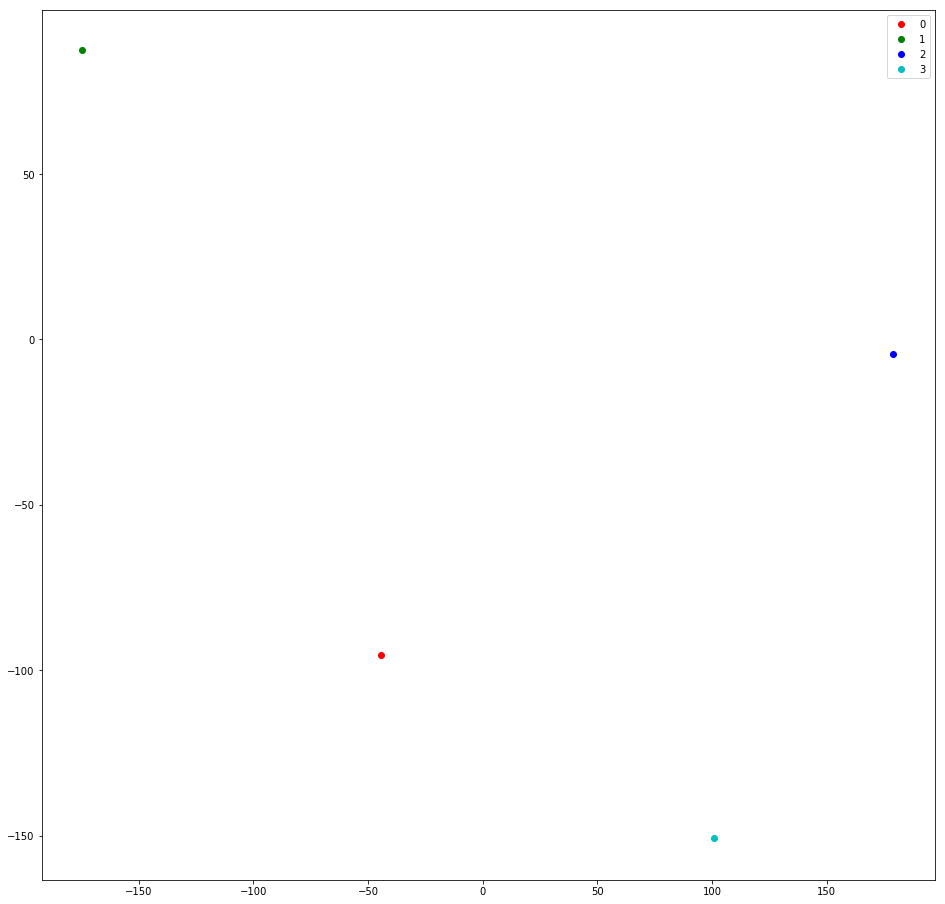

In [3]:
from matplotlib import pyplot as plt
#from sklearn.manifold import TSNE
from sklearn import datasets
digits = datasets.load_digits()

#2-dimensionales tsne model erstellen
#tsne = TSNE(n_components=2, random_state=0)

#vizualize as a scatterplott
target_ids = range(len(digits.target_names))
plt.figure(figsize=(16, 16))
colors = 'r', 'g', 'b', 'c'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

---
## create your own embeddings and vizualize it in s-dim

1. initialize model with own tiny dataset
2. vizualize model as scatterplott

In [4]:
from gensim.models import Word2Vec

In [5]:
# dataset
#tokenized_sentences = [['human', 'in', 'interface', 'is', 'kind', 'of', 'a', 'computer', 'survey'],['the', 'user', 'as', 'system', 'in' 'response', 'on', 'time', 'and', 'trees', 'and', 'graph', 'as', 'minors']]

#or read in text from file
f=open('../data/loaded-language.txt','r',errors = 'ignore')
raw=f.read()
raw = raw.lower()# converts to lowercase

In [7]:
#tokenization
#import nltk
#nltk.download('punkt')

#from nltk.tokenize import sent_tokenize
#tokenized_text=sent_tokenize(raw)

from nltk.tokenize import word_tokenize
tokenized_text=word_tokenize(raw)

In [6]:
# print stopwords
##from nltk.corpus import stopwords
##print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
#extract stopwords
'''
filtered_sentence = []
stop_words = set(stopwords.words('english'))
for w in tokenized_text:
    if w not in stop_words:
        filtered_sentence.append(w)
  
#print(word_tokens)
print(filtered_sentence[0:20])
'''

['``', 'francis', 'farrell', '’', "'sinod", "'", 'youth', ',', '#', 'stopthe', 'synod2018', 'last', '5', 'years', 'papacy', ',', 'francis', 'synodal', 'schemers', 'masterfully']


In [8]:
print(tokenized_text[0:10])

['``', 'francis', 'and', 'farrell', '’', 's', "'sinod", "'", 'on', 'the']


In [9]:
# text speziell für word2vec-modell vorbereiten
texts = [[text for text in doc.split()] for doc in tokenized_text]
print(texts[0:10])

[['``'], ['francis'], ['and'], ['farrell'], ['’'], ['s'], ["'sinod"], ["'"], ['on'], ['the']]


In [10]:
# model initialize / train
model = Word2Vec(texts, min_count=1, size=100) # 100 is default

In [11]:
# print a summary of the model << NACHSEHEN GENAU!!!!
##vocab = anzahl der wörter
##size = layergröße (wieviele vektoren pro wort)
##alpha = vector of error gradients multiplied by the learning rate
print(model)

Word2Vec(vocab=20468, size=100, alpha=0.025)


In [12]:
# create list from vocab list 
words = model.wv.vocab.keys()
#print(words)

In [13]:
# print numpy vektor (100) from word 'as' 
model.wv['as']

array([ 0.00458352, -0.0031126 ,  0.0044187 , -0.00391326, -0.00079001,
       -0.00263727, -0.00490935, -0.00444549,  0.00444524, -0.00039457,
        0.00167107,  0.00466913, -0.00473823, -0.00462411, -0.00183685,
       -0.00100735, -0.00336392, -0.00403607, -0.00477133,  0.00064531,
        0.0042905 ,  0.00032258, -0.00492937,  0.00399807, -0.00166229,
        0.00116016, -0.00353129,  0.00253914, -0.00311437, -0.00414365,
        0.0006108 ,  0.00104043, -0.00212878, -0.00336356,  0.0024493 ,
       -0.00409501,  0.0003043 ,  0.00139896,  0.00463415, -0.00255664,
        0.00178407,  0.00122566,  0.00184466,  0.00113303, -0.00168052,
        0.00226672,  0.00077444, -0.00218197,  0.00077747, -0.00110021,
        0.00373443,  0.00409735, -0.00401717,  0.00367055, -0.0032223 ,
        0.00306832, -0.0022298 , -0.00223066,  0.0040597 ,  0.00477386,
       -0.0023811 , -0.00033827,  0.00369878,  0.00123452, -0.00199153,
       -0.00444812, -0.00431934, -0.00259846, -0.00279264, -0.00

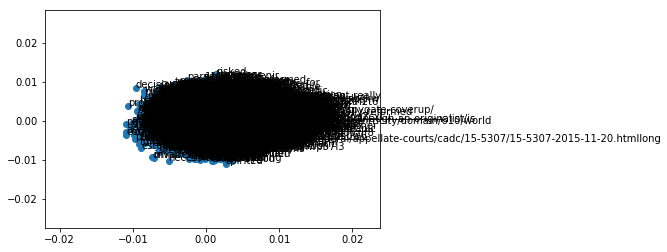

None

In [14]:
#create PCA Plptt
from sklearn.decomposition import PCA
from matplotlib import pyplot

X = model.wv[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
display(pyplot.show())

# fooling around with analogy- und similarity tasks...
* examples: https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html 
* more examples...: https://x.st/fooling-around-with-word-embeddings/


![](../data/wkm.png)

In [ ]:
#Find the top-N most similar words
word2vec_result2 = model.most_similar('human', topn=5)
print("most nearest to human = ", word2vec_result2, "\n")

In [ ]:
# A to B is X to Y
# hierzu siehe auch CBOW und skip-gram
## Bedeutungen errechnen
## calculate: KÖNIG - MANN + FRAU = KÖNIGIN
word2vec_result1 = model.most_similar(positive=['human', 'computer'], negative=['user'], topn=10)
# topn = wieviele ouputs sollen vorgeschlagen werden?
print("human - user + computer = ", word2vec_result1, "\n")

In [ ]:
# Which word from the given list doesn’t go with the others?
print(model.wv.doesnt_match("human survey system and minors".split()))

In [ ]:
# Compute cosine similarity between two words.
print(model.wv.similarity('human', 'life'))

In [ ]:
# Compute cosine similarity between two sets of words
sim = model.wv.n_similarity(['user', 'term'], ['life', 'system'])
print("{:.4f}".format(sim))

In [ ]:
# A to B is X to Y
# hierzu siehe auch CBOW und skip-gram
## Bedeutungen errechnen
## calculate: KÖNIG - MANN + FRAU = KÖNIGIN
word2vec_result1 = model.most_similar(positive=['human', 'computer'], negative=['user'], topn=10)
# topn = wieviele ouputs sollen vorgeschlagen werden?
print("human - user + computer = ", word2vec_result1, "\n")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 10)

def plot_words(*words, lines=False):
    pca = PCA(n_components=2)
    xys = pca.fit_transform([model.wv[w] for w in words])

    if lines:
        for i in range(0, len(words), 2):
            plt.plot(xys[i:i+2, 0], xys[i:i+2, 1])
    else:
        plt.scatter(*xys.T)

    for word, xy in zip(words, xys):
        plt.annotate(word, xy, fontsize=20)

    return pca

plt.title('ähnliche Wörter haben ähnliche Vektoren', fontsize=20)

plot_words('response', 'is', 'and', 'in', 'time')

In [ ]:
#Using Pretrained Embeddings
#Download glove embeddings. Downloading and accessing this might take up to several minutes.

import gensim.downloader as api

glove_model = api.load('glove-wiki-gigaword-50')
print('model loaded')

In [ ]:
# calculate: (king - man) + woman = ?
glove_result = glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(glove_result)

In [ ]:
# calculate N most similar words to 
glove_model.most_similar(positive=['boy'], topn=10)